In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

add = pd.read_csv('C:\\신현호\\2021_2학기_공모전\\final_location02.csv', encoding = 'cp949')
add

,주소,y,x
0,서울특별시 마포구 매봉산로 37,37.576052,126.890599
1,서울특별시 마포구 매봉산로 80,37.578530,126.894285
2,서울특별시 강남구 남부순환로3104,37.495679,127.071912
3,서울특별시 강남구 개포로 621,37.494131,127.078783
4,서울특별시 송파구 양재대로 932,37.494538,127.108714
...,...,...,...
2948,"서울특별시 영등포구 선유로17길 24(문래동6가, 문래신일아르디세)",37.521127,126.887036
2949,서울특별시 양천구 목동서로 301-21양천공원(신정동 319-17),37.519087,126.869153
2950,서울특별시 양천구 목동서로 367양천문화회관(322 양천문화회관),37.516521,126.863340
2951,서울특별시 양천구 목동동로 363파리공원(906 파리공원),37.534477,126.877142


Text(0, 0.5, '경도')

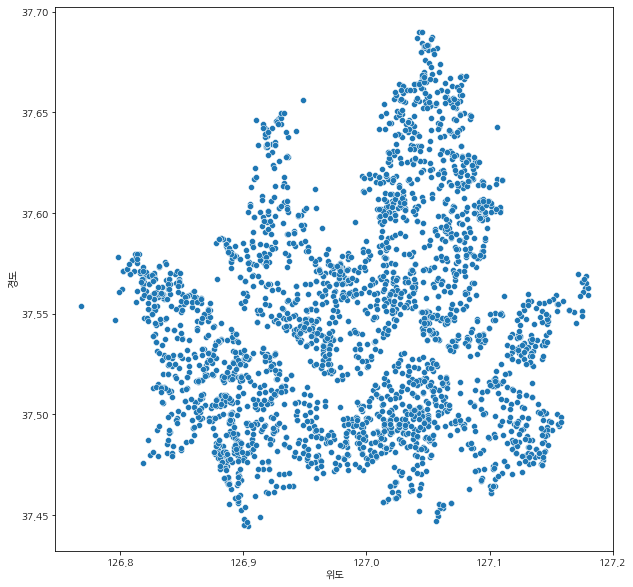

In [17]:
plt.figure(figsize=(10,10))
import matplotlib

plt.rc('font', family='NanumGothic')
matplotlib.rcParams['axes.unicode_minus'] = False
sns.scatterplot(data=add, x='x',y='y')
plt.xlabel('위도')
plt.ylabel('경도')

In [18]:
import folium

lat = add['y'].mean()
long = add['x'].mean()

m = folium.Map([lat,long],zoom_start=9)

In [19]:
import json

geo = json.load(open('C:\\Users\\hhshi\\OneDrive\\바탕 화면\\seoul_municipalities_geo_simple.json',
                    encoding='utf-8'))

In [20]:
# from folium.plugins import MarkerCluster

# # for i in add.index:
# #     tmp_lat =  add.loc[i,'y']
# #     tmp_long = add.loc[i,'x']
    
# #     folium.Marker([tmp_lat,tmp_long]).add_to(mp)
# latlong = add[['y', 'x']]

# marker_cluster = MarkerCluster().add_to(m)

# for lat, long in zip(latlong.y, latlong.x):
#     folium.Marker([lat,long], icon = folium.Icon(color="blue")).add_to(marker_cluster)

# m

In [21]:
loc = pd.read_csv('C:\\신현호\\2021_2학기_공모전\\코드구성\\전기차 충전소 수\\charger_location_folium.csv',
                 encoding='utf-8')
loc

,주소,코드,충전소 수
0,강동구,11250,96
1,송파구,11240,169
2,강남구,11230,238
3,서초구,11220,224
4,관악구,11210,80
5,동작구,11200,79
6,영등포구,11190,131
7,금천구,11180,101
8,구로구,11170,132
9,강서구,11160,191


In [22]:
for i in range(len(loc)):
    loc.loc[i,"코드"] = str(loc.loc[i,"코드"])

In [23]:
#범례 중복 방지 함수
def folium_del_legend(choropleth: folium.Choropleth): 
    del_list = [] 
    for child in choropleth._children: 
        if child.startswith('color_map'): 
            del_list.append(child) 
    for del_item in del_list: 
        choropleth._children.pop(del_item) 
    return choropleth

In [25]:
k = folium.Choropleth(geo_data = geo,
             data=loc,
             columns=['코드','충전소 수'],
             fill_color= 'Oranges',
             key_on='properties.code',
             legend_name='각 구별 충전소 수').add_to(m)
folium_del_legend(k)
m.save('seoul_electric_car_charger.html')
m